In [9]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas

%matplotlib widget

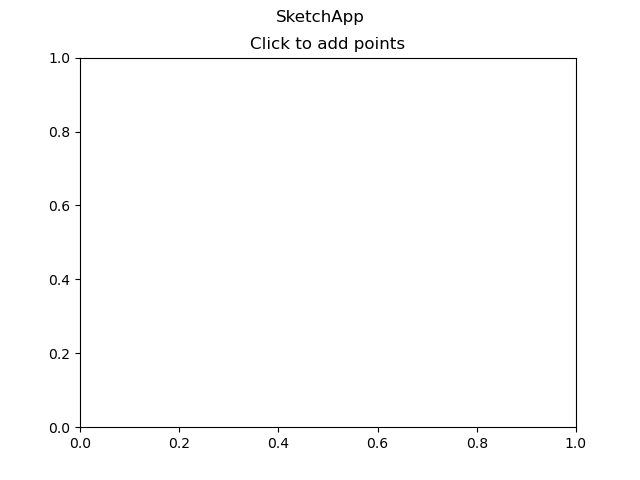

Coordinates of the points:


No such comm: 47b9e284e29c4fc89040ec37c08fccdf
No such comm: 47b9e284e29c4fc89040ec37c08fccdf
No such comm: 47b9e284e29c4fc89040ec37c08fccdf
No such comm: 47b9e284e29c4fc89040ec37c08fccdf
No such comm: 47b9e284e29c4fc89040ec37c08fccdf
No such comm: 47b9e284e29c4fc89040ec37c08fccdf


In [2]:
# Initialize lists to store the coordinates of points
x_points = []
y_points = []

# Function to handle mouse click events
def onclick(event):
    x = event.xdata
    y = event.ydata
    if x is not None and y is not None:
        x_points.append(x)
        y_points.append(y)
        plt.scatter(x, y, color='red')
        plt.draw()

# Create a plot
fig, ax = plt.subplots()
ax.set_title('Click to add points')

fig.suptitle("SketchApp")

# Connect the 'button_press_event' to the onclick function
cid = fig.canvas.mpl_connect('button_press_event', onclick)

# Display the plot
plt.show()

# Print the coordinates of the points
print("Coordinates of the points:")
for x, y in zip(x_points, y_points):
    print(f"({x}, {y})")

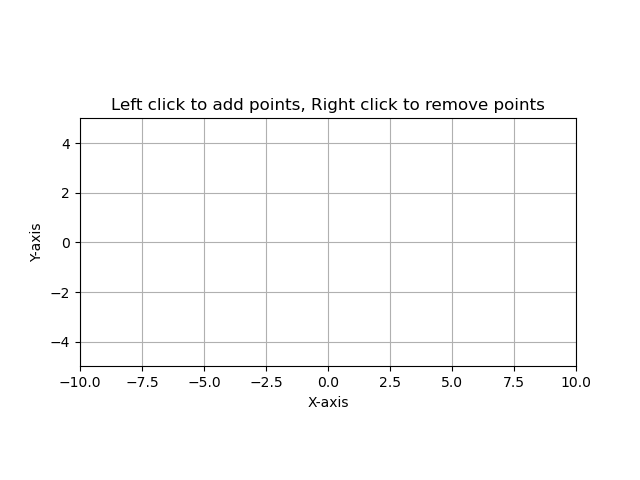

No such comm: 1b41011ba2a04325a6d71a880df8a0d2
No such comm: 1b41011ba2a04325a6d71a880df8a0d2
No such comm: 1b41011ba2a04325a6d71a880df8a0d2
No such comm: 1b41011ba2a04325a6d71a880df8a0d2
No such comm: 1b41011ba2a04325a6d71a880df8a0d2
No such comm: 1b41011ba2a04325a6d71a880df8a0d2


In [3]:
# Initialize lists to store the coordinates of points
x_points = []
y_points = []

# Initialize variables to track dragging
dragging = False
drag_point_index = None

# Function to handle mouse events
def on_click(event):
    global dragging, drag_point_index
    if event.button == 1:  # Left click
        x = event.xdata
        y = event.ydata
        if x is not None and y is not None:
            if event.dblclick:  # Double click
                # Check if clicked on an existing point to remove it
                for i, (px, py) in enumerate(zip(x_points, y_points)):
                    if np.sqrt((x - px)**2 + (y - py)**2) <= 0.1:
                        x_points.pop(i)
                        y_points.pop(i)
                        plt.cla()
                        plot_points()
                        plt.draw()
                        return
            else:
                # Check if clicked on an existing point to start dragging
                for i, (px, py) in enumerate(zip(x_points, y_points)):
                    if np.sqrt((x - px)**2 + (y - py)**2) <= 0.1:
                        dragging = True
                        drag_point_index = i
                        return
                # Add a new point
                x_points.append(x)
                y_points.append(y)
                plt.cla()
                plot_points()
                plt.draw()
    elif event.button == 3:  # Right click
        x = event.xdata
        y = event.ydata
        if x is not None and y is not None:
            # Check if clicked on an existing point to remove it
            for i, (px, py) in enumerate(zip(x_points, y_points)):
                if np.sqrt((x - px)**2 + (y - py)**2) <= 0.1:
                    x_points.pop(i)
                    y_points.pop(i)
                    plt.cla()
                    plot_points()
                    plt.draw()
                    return

def on_motion(event):
    global dragging
    if dragging:
        x = event.xdata
        y = event.ydata
        if x is not None and y is not None:
            x_points[drag_point_index] = x
            y_points[drag_point_index] = y
            plt.cla()
            plot_points()
            plt.draw()

# Function to plot the points
def plot_points():
    
    plt.scatter(x_points, y_points, color='red')
    
    ax.set_xlim((-10, 10))
    ax.set_ylim((-5,5))
    ax.set_aspect('equal')
    
    ax.set_title('Left click to add points, Right click to remove points')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    
    # Display the plot
    plt.grid(True)

# Create a plot
fig, ax = plt.subplots()

# Connect the event handlers
fig.canvas.mpl_connect('button_press_event', on_click)
fig.canvas.mpl_connect('motion_notify_event', on_motion)

plot_points()

plt.show()


In [4]:
from scipy.interpolate import CubicSpline, PchipInterpolator

interpolator = PchipInterpolator

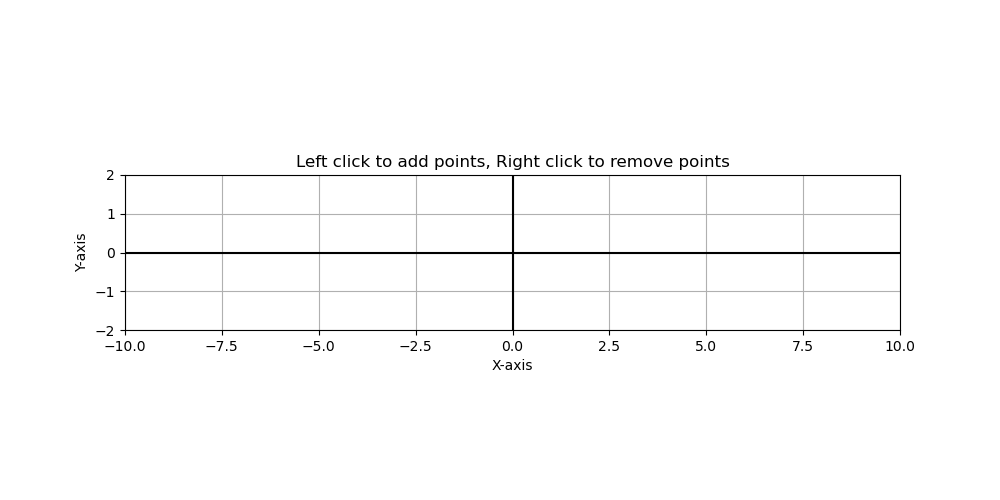

In [10]:
xmin = -10
xmax = 10

ymin = -2
ymax = 2

aspect_ratio = (xmax - xmin) / (ymax - ymin) / 5

# Initialize lists to store the coordinates of points
x_points = []
y_points = []

epsilon = 0.5

# Function to handle mouse events
def on_click(event, **kwargs):
    try:
        x = event.xdata
        y = event.ydata
        
        if x and y:

            if event.button == 1:  # Left click
                
                x_points.append(x)
                y_points.append(y)
                        
            elif event.button == 3:  # Right click
                
                x_array = np.array(x_points)
                y_array = np.array(y_points)
                
                distances = np.sqrt((x_array-x)**2 + (y_array-y)**2)
                
                # Check if clicked on an existing point to remove it
                if any(distances < epsilon):
                    
                    id = np.argwhere(distances<epsilon)[0][0]
                    
                    x_points.pop(id)
                    y_points.pop(id)
    except TypeError:
        pass
    plot_points(kwargs)


# Function to plot the points
def plot_points(lim_to_zero=True):
    
    plt.cla()
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    if lim_to_zero:
        plot_x_points = [xmin] + x_points + [xmax]
        plot_y_points = [0] + y_points + [0]
    else:
        plot_x_points = x_points
        plot_y_points = y_points
    
    try:
        sort_ids = np.argsort(plot_x_points)
        
        plot_x_points = np.array(plot_x_points)[sort_ids]
        plot_y_points = np.array(plot_y_points)[sort_ids]
        
        cs = interpolator(plot_x_points, plot_y_points, extrapolate=None)
    
        xs = np.linspace(xmin, xmax, 100)
        ys = cs(xs)
        
        ax.plot(xs, ys, color='r')
    
    except:
        pass
    
    plt.scatter(plot_x_points, plot_y_points, color='red')
            
    ax.set_xlim((xmin, xmax))
    ax.set_ylim((ymin, ymax))
    ax.set_aspect(aspect_ratio)
    
    ax.set_title('Left click to add points, Right click to remove points')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    
    # Display the plot
    plt.grid(True)
    
    plt.draw()

# Create a plot
fig, ax = plt.subplots(figsize=(10,5))

# Connect the event handlers
fig.canvas.mpl_connect('button_press_event', on_click)
fig.canvas.mpl_connect('motion_notify_event', on_motion)

plot_points(lim_to_zero=False)

plt.show()

In [6]:
plt.close(fig='all')